In [9]:
import os

import numpy as np
from scipy.sparse import coo_matrix
from sklearn.preprocessing import normalize
import torch

from rdkit.Chem import AddHs, AllChem, MolToSequence, MolToSmiles, MolFromSmiles
from rdkit.Chem.Descriptors import ExactMolWt
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions
from rdkit.Chem.rdchem import BondDir, BondType, ChiralType
from rdkit.Chem.rdmolfiles import SDMolSupplier
from rdkit.Chem.rdmolops import GetAdjacencyMatrix, Get3DDistanceMatrix, GetDistanceMatrix
from rdkit.Chem.rdMolTransforms import GetAngleDeg

IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.drawOptions.addBondIndices = True
IPythonConsole.molSize = 300,300

In [8]:
IPythonConsole.drawOptions.scaleHighlightBondWidth = True

In [18]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:
ROOT = '..'

In [3]:
gdb7 = SDMolSupplier(os.path.join(ROOT, 'data/gdb7/gdb7.sdf'), removeHs=False)
gdb7

In [4]:
ch4 = gdb7[0]
c2h6 = gdb7[1]
c2h4 = gdb7[2]
c2h2 = gdb7[3]
c6h6 = MolFromSmiles('C1=CC=CC=C1')

[00:20:47] Warning: molecule is tagged as 3D, but all Z coords are zero
[00:20:47] Warning: molecule is tagged as 3D, but all Z coords are zero


In [7]:
c2h4.GetNumBonds()

5

In [10]:
c2h4.GetAtomWithIdx(1).GetMass()

12.011

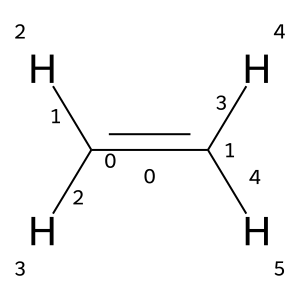

In [8]:
c2h4

In [62]:
c2h6.GetBondWithIdx(3).GetBeginAtomIdx()

1

In [63]:
c2h6.GetBondWithIdx(3).GetEndAtomIdx()

5

In [158]:
ch4_H = AddHs(ch4)

In [289]:
c6h6_H = AddHs(c6h6)

In [290]:
AllChem.EmbedMolecule(c6h6_H)
AllChem.MMFFOptimizeMolecule(c6h6_H)

0

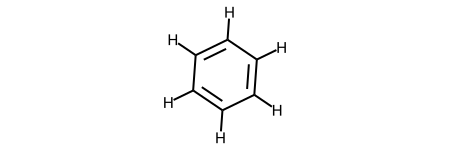

In [291]:
c6h6_H

In [ ]:
GetAdjacencyMatrix(c6h6_H)

array([[0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]], dtype=int32)

In [203]:
Get3DDistanceMatrix(ch4_H)

array([[0.        , 0.42186708, 0.42186708, 1.10795808, 1.10606298],
       [0.42186708, 0.        , 0.        , 0.93286057, 0.93211064],
       [0.42186708, 0.        , 0.        , 0.93286057, 0.93211064],
       [1.10795808, 0.93286057, 0.93286057, 0.        , 1.81663049],
       [1.10606298, 0.93211064, 0.93211064, 1.81663049, 0.        ]])

In [182]:
m = ch4_H.GetConformer().GetPositions()
m

array([[-9.04021149e-04,  4.21866108e-01, -0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 9.08767212e-01, -2.10644246e-01,  0.00000000e+00],
       [-9.07863191e-01, -2.11221862e-01, -0.00000000e+00]])

In [185]:
np.sqrt(np.sum((m[0] - m[1]) ** 2))

0.42186707647968846

In [164]:
for atom in c6h6_H.GetAtoms():
    print(atom.GetIsAromatic())

True
True
True
True
True
True
False
False
False
False
False
False


In [133]:
for atom in AddHs(c2h6).GetAtoms():
    print(atom.GetSymbol(), atom.GetAtomicNum(), atom.GetNeighbors())

C 6 (<rdkit.Chem.rdchem.Atom object at 0x000002C60FDD2CE0>, <rdkit.Chem.rdchem.Atom object at 0x000002C60FDD2740>, <rdkit.Chem.rdchem.Atom object at 0x000002C60FDD3EE0>, <rdkit.Chem.rdchem.Atom object at 0x000002C60FDD3DC0>)
C 6 (<rdkit.Chem.rdchem.Atom object at 0x000002C60FDD38E0>, <rdkit.Chem.rdchem.Atom object at 0x000002C60FDD2740>, <rdkit.Chem.rdchem.Atom object at 0x000002C60FDD3EE0>, <rdkit.Chem.rdchem.Atom object at 0x000002C60FDD3DC0>)
H 1 (<rdkit.Chem.rdchem.Atom object at 0x000002C60FDD2CE0>,)
H 1 (<rdkit.Chem.rdchem.Atom object at 0x000002C60FDD38E0>,)
H 1 (<rdkit.Chem.rdchem.Atom object at 0x000002C60FDD2CE0>,)
H 1 (<rdkit.Chem.rdchem.Atom object at 0x000002C60FDD38E0>,)
H 1 (<rdkit.Chem.rdchem.Atom object at 0x000002C60FDD2CE0>,)
H 1 (<rdkit.Chem.rdchem.Atom object at 0x000002C60FDD38E0>,)


In [128]:
c = ch4_H.GetAtomWithIdx(0)

In [130]:
c.GetNumExplicitHs()

0

In [71]:
print(c6h6.GetAtomWithIdx(0).GetIsAromatic())
print(list(c6h6.GetAromaticAtoms()))

True
[<rdkit.Chem.rdchem.Atom object at 0x000002C60FD757E0>, <rdkit.Chem.rdchem.Atom object at 0x000002C60FD756C0>, <rdkit.Chem.rdchem.Atom object at 0x000002C60FD75840>, <rdkit.Chem.rdchem.Atom object at 0x000002C60FD75780>, <rdkit.Chem.rdchem.Atom object at 0x000002C60FD75900>, <rdkit.Chem.rdchem.Atom object at 0x000002C60FD75960>]


# Atom features

In [253]:
def get_atom_type_feature(mol) -> np.ndarray:
    # num_As x 119
    nrows = mol.GetNumAtoms()
    ncols = 119

    atom_type = torch.zeros((nrows, ncols))

    for i in range(nrows):
        atom_type[i][mol.GetAtomWithIdx(i).GetAtomicNum()] = 1
    
    return atom_type

In [254]:
def get_aromaticity_feature(mol) -> np.ndarray:
    # num_As x 2
    nrows = mol.GetNumAtoms()
    ncols = 2

    aromaticity = torch.zeros((nrows, ncols))

    for i in range(nrows):
        if mol.GetAtomWithIdx(i).GetIsAromatic():
            aromaticity[i][1] = 1
        else:
            aromaticity[i][0] = 1
    
    return aromaticity

In [255]:
def get_formal_charge_feature(mol) -> np.ndarray:
    # num_As x 16
    nrows = mol.GetNumAtoms()
    ncols = 16

    formal_charge = torch.zeros((nrows, ncols))

    for i in range(nrows):
        formal_charge[i][mol.GetAtomWithIdx(i).GetFormalCharge()] = 1

    return formal_charge

In [256]:
def get_chiral_tag_feature(mol) -> np.ndarray:
    # CHI_UNSPECIFIED       = 0
    # CHI_TETRAHEDRAL_CW    = 1
    # CHI_TETRAHEDRAL_CCW   = 2
    # CHI_OTHER             = 3

    # num_As x 4
    nrows = mol.GetNumAtoms()
    ncols = len(ChiralType.values) # 4

    chiral_tag = torch.zeros((nrows, ncols))

    for i in range(nrows):
        chiral_tag[i][mol.GetAtomWithIdx(i).GetChiralTag()] = 1

    return chiral_tag

In [257]:
def get_degree_feature(mol) -> np.ndarray:
    # num_As x 11
    nrows = mol.GetNumAtoms()
    ncols = 11

    degree = torch.zeros((nrows, ncols))

    for i in range(nrows):
        degree[i][mol.GetAtomWithIdx(i).GetDegree()] = 1
    
    return degree

In [299]:
def get_num_bonded_Hs_feature(mol):
    # num_As x 9
    nrows = mol.GetNumAtoms()
    ncols = 9

    num_bonded_Hs = torch.zeros((nrows, ncols))

    for i in range(nrows):
        num_bonded_Hs[i][mol.GetAtomWithIdx(i).GetNumExplicitHs()] = 1

    return num_bonded_Hs

In [302]:
get_num_bonded_Hs_feature(c2h6)

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [259]:
def get_hybridization_feature(mol):
    # SP    = 2
    # SP2   = 3
    # SP3   = 4
    # SP3D  = 5
    # SP3D2 = 6

    # num_As x 5
    nrows = mol.GetNumAtoms()
    ncols = 5

    hybridization = torch.zeros((nrows, ncols))

    for i in range(nrows):
        hybridization[i][mol.GetAtomWithIdx(i).GetHybridization() - 2] = 1
    
    return hybridization

In [260]:
get_hybridization_feature(ch4_H)

tensor([[0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.]])

# Bond features

In [261]:
def get_bond_dir_feature(mol) -> np.ndarray:
    # NONE          = 0
    # BEGINWEDGE    = 1
    # BEGINDASH     = 2
    # ENDDOWNRIGHT  = 3
    # ENDUPRIGHT    = 4
    # EITHERDOUBLE  = 5
    # UNKNOWN       = 6

    # num_Bs x 7
    nrows = mol.GetNumBonds()
    ncols = len(BondDir.values) # 7

    bond_dir = torch.zeros((nrows, ncols))

    for i in range(nrows):
        bond_dir[i][mol.GetBondWithIdx(i).GetBondDir()] = 1
    
    return bond_dir

In [262]:
def get_bond_type_feature(mol) -> np.ndarray:
    # SINGLE    = 1 -> 0
    # DOUBLE    = 2 -> 1
    # TRIPLE    = 3 -> 2
    # AROMATIC = 12 -> 3
    
    value_to_idx = {
        BondType.SINGLE:    0,
        BondType.DOUBLE:    1,
        BondType.TRIPLE:    2,
        BondType.AROMATIC:  3
    }

    # num_Bs x 4
    nrows = mol.GetNumBonds()
    ncols = 4

    bond_type = torch.zeros((nrows, ncols))

    for i in range(nrows):
        bond_type[i][value_to_idx[mol.GetBondWithIdx(i).GetBondType()]] = 1
    
    return bond_type

In [263]:
def get_in_ring_feature(mol) -> np.ndarray:
    # num_Bs x 2
    nrows = mol.GetNumBonds()
    ncols = 2

    in_ring = torch.zeros((nrows, ncols))

    for i in range(nrows):
        if mol.GetBondWithIdx(i).IsInRing():
            in_ring[i][1] = 1
        else:
            in_ring[i][0] = 1
    
    return in_ring

In [304]:
def radial_basis_function(x, centers, gamma=10) -> np.ndarray:
    return np.exp(-gamma * (x - centers) ** 2)

def rdf_continuous_to_discrete(x, min_val=0, max_val=2, stride=0.1) -> np.ndarray:
    centers = [val for val in np.arange(min_val, max_val, stride)]

    nrows = len(x)
    ncols = len(centers)

    # Clone a vector of size (1, n) to matrix of size (n, m)
    # say [1, 2, 3, 4] ->  [[1, 1, 1],
    #                       [2, 2, 2],
    #                       [3, 3, 3],
    #                       [4, 4, 4]]
    x = np.tile(x, (ncols, 1)).T
    # print(x)

    return radial_basis_function(x, centers)

In [303]:
def get_bond_length_feature(mol) -> np.ndarray:
    # num_Bs x N
    nrows = mol.GetNumBonds()

    cont_bond_length = np.zeros((nrows,))

    dist_mat = Get3DDistanceMatrix(mol)

    for i in range(nrows):
        begin_atom_idx = mol.GetBondWithIdx(i).GetBeginAtomIdx()
        end_atom_idx = mol.GetBondWithIdx(i).GetEndAtomIdx()

        cont_bond_length[i] = dist_mat[begin_atom_idx][end_atom_idx]
    
    # min_dist = np.min(cont_bond_length)
    # max_dist = np.max(cont_bond_length)

    return torch.tensor(rdf_continuous_to_discrete(cont_bond_length))#, min_dist, max_dist))

In [305]:
get_bond_length_feature(c6h6_H)

tensor([[3.5533e-09, 5.2328e-08, 6.3092e-07, 6.2281e-06, 5.0336e-05, 3.3308e-04,
         1.8045e-03, 8.0039e-03, 2.9066e-02, 8.6421e-02, 2.1037e-01, 4.1928e-01,
         6.8416e-01, 9.1401e-01, 9.9973e-01, 8.9528e-01, 6.5641e-01, 3.9404e-01,
         1.9366e-01, 7.7925e-02],
        [3.5533e-09, 5.2328e-08, 6.3092e-07, 6.2281e-06, 5.0336e-05, 3.3308e-04,
         1.8045e-03, 8.0039e-03, 2.9066e-02, 8.6421e-02, 2.1037e-01, 4.1928e-01,
         6.8415e-01, 9.1400e-01, 9.9973e-01, 8.9528e-01, 6.5641e-01, 3.9404e-01,
         1.9366e-01, 7.7925e-02],
        [3.5533e-09, 5.2328e-08, 6.3092e-07, 6.2281e-06, 5.0336e-05, 3.3308e-04,
         1.8045e-03, 8.0039e-03, 2.9066e-02, 8.6421e-02, 2.1037e-01, 4.1928e-01,
         6.8415e-01, 9.1400e-01, 9.9973e-01, 8.9528e-01, 6.5641e-01, 3.9404e-01,
         1.9366e-01, 7.7925e-02],
        [3.5533e-09, 5.2328e-08, 6.3092e-07, 6.2281e-06, 5.0336e-05, 3.3308e-04,
         1.8045e-03, 8.0039e-03, 2.9066e-02, 8.6421e-02, 2.1037e-01, 4.1928e-01,
       

# Bond-angle feature

In [238]:
def get_bond_angles(mol) -> list:
    # Return a list of bond-angles, with each entry as an indice tuple of (end_atom_1, connecting_atom, end_atom_2)
    bonds = mol.GetBonds()
    num_bonds = len(bonds)
    
    bond_angles = []

    for i in range(num_bonds):
        for j in range(num_bonds):
            if bonds[i].GetEndAtomIdx() == bonds[j].GetBeginAtomIdx():
                bond_angles.append((bonds[i].GetBeginAtomIdx(), bonds[i].GetEndAtomIdx(), bonds[j].GetEndAtomIdx()))
            elif bonds[i].GetBeginAtomIdx() == bonds[j].GetEndAtomIdx():
                bond_angles.append((bonds[j].GetBeginAtomIdx(), bonds[j].GetEndAtomIdx(), bonds[i].GetEndAtomIdx()))
    
    return bond_angles

In [306]:
def get_bond_angle_feature(mol) -> np.ndarray:
    # num_BAs x N
    conf = mol.GetConformer()
    bond_angles_list = get_bond_angles(mol)

    bond_angle = [GetAngleDeg(conf, ba[0], ba[1], ba[2]) for ba in bond_angles_list]

    bond_angle_norm = np.squeeze((normalize([bond_angle])))

    # min_angle = np.min(bond_angle_norm)
    # max_angle = np.max(bond_angle_norm)

    return torch.tensor(rdf_continuous_to_discrete(bond_angle_norm))#, min_angle, max_angle))

In [307]:
get_bond_angle_feature(c6h6_H)

tensor([[6.5924e-01, 8.9725e-01, 9.9983e-01, 9.1218e-01, 6.8135e-01, 4.1668e-01,
         2.0863e-01, 8.5527e-02, 2.8705e-02, 7.8878e-03, 1.7746e-03, 3.2687e-04,
         4.9295e-05, 6.0865e-06, 6.1528e-07, 5.0923e-08, 3.4507e-09, 1.9144e-10,
         8.6956e-12, 3.2338e-13],
        [6.5924e-01, 8.9725e-01, 9.9983e-01, 9.1218e-01, 6.8135e-01, 4.1668e-01,
         2.0863e-01, 8.5527e-02, 2.8705e-02, 7.8878e-03, 1.7746e-03, 3.2687e-04,
         4.9295e-05, 6.0865e-06, 6.1528e-07, 5.0923e-08, 3.4507e-09, 1.9144e-10,
         8.6957e-12, 3.2338e-13],
        [6.5924e-01, 8.9725e-01, 9.9983e-01, 9.1218e-01, 6.8135e-01, 4.1669e-01,
         2.0863e-01, 8.5527e-02, 2.8705e-02, 7.8879e-03, 1.7746e-03, 3.2687e-04,
         4.9295e-05, 6.0865e-06, 6.1528e-07, 5.0924e-08, 3.4507e-09, 1.9144e-10,
         8.6957e-12, 3.2338e-13],
        [6.5924e-01, 8.9725e-01, 9.9983e-01, 9.1218e-01, 6.8135e-01, 4.1668e-01,
         2.0863e-01, 8.5527e-02, 2.8705e-02, 7.8878e-03, 1.7746e-03, 3.2687e-04,
       

# Generate graphs

## Atom-bond graph

In [273]:
def get_atom_bond_graph(mol) -> np.ndarray:
    return torch.tensor(GetAdjacencyMatrix(mol))

In [277]:
def get_bond_angle_graph(mol) -> np.ndarray:
    bonds = mol.GetBonds()

    nrows = ncols = len(bonds)

    graph = np.zeros((nrows, ncols), dtype='int32')

    for i in range(nrows):
        for j in range(ncols):
            if bonds[i].GetEndAtomIdx() == bonds[j].GetBeginAtomIdx() \
            or bonds[i].GetBeginAtomIdx() == bonds[j].GetEndAtomIdx():
                graph[i][j] = 1

    return torch.tensor(graph)

In [274]:
get_atom_bond_graph(c6h6_H)

tensor([[0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0],
        [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]], dtype=torch.int32)

In [278]:
get_bond_angle_graph(c6h6_H)

tensor([[0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
        [1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]], dtype=torch.int32)

In [283]:
coo_matrix(get_atom_bond_graph(c6h6_H)).row

array([ 0,  0,  0,  1,  1,  1,  2,  2,  2,  3,  3,  3,  4,  4,  4,  5,  5,
        5,  6,  7,  8,  9, 10, 11], dtype=int32)

In [284]:
coo_matrix(get_atom_bond_graph(c6h6_H)).col

array([ 1,  5,  6,  0,  2,  7,  1,  3,  8,  2,  4,  9,  3,  5, 10,  0,  4,
       11,  0,  1,  2,  3,  4,  5], dtype=int32)